`Linear regression` tries to find a function (line) that best fits your data. The goal is to minimize the error.

**`Linear function`** : $y = mx + b$

# MSE (mean squared error)

  <font size="5"> $E$ = $\frac{1}{n}$ * $\sum_{i=0}^{n}$ ($y_{i} - \hat{y_{i}}$)$^{2}$  </font> 

Knowing the `linear function` and `MSE`, we can substitute the linear function in for $\hat{y_{i}}$:

  <font size="5">  $\frac{1}{n}$ * $\sum_{i=0}^{n}$ ($y_{i}$ - ($mx + b$))$^{2}$  </font> 

Remember, the goal is to **minimize $E$** (in this case, `MSE`). We want to find the line that gives us the lowest possible $E$. 

In the `MSE` equation, the only values that we can influence are $m$ and $b$. So, we want to find $m$ and $b$ so we can minimize error

--------

## Some terms to know before proceesing:

### Derivative
`Derivative` - describes the **instantaneous rate of change** (`slope`) of a **vertical variable** with respect to a **horizontal variable**

It's called `instantaneous` because the slope of a curved line is constantly changing, unlike with a `linear` function, which holds a constant slope.

Given two ($x,y$) points on a line, we can calculate their slope  (also known as `rise over run`):
- `change in x` = $\Delta x$
- `change in y` = $\Delta y$
- `slope` = <font size="5"> $\frac{\Delta y}{\Delta x}$ </font>

When calculating the `derivative` of a curved line, we **pick a point** on the curve and **calculate the slope of its tangent line** at that moment in time

`slope of the tangent line` = <font size="5"> $\frac{dy}{dx}$ </font> or <font size="5"> $\frac{df}{dx}$ </font> (same equation, slightly different variable naming)



------
# Gradient descent

We use the  `gradient descent` algorithm to minimize the error. The `gradient` gives us the direction of the steepest ascent.

Some notes on gradient descent:
- We take the **partial derivative** with respect to $m$ and respect to $b$ 
- The **partial derivative** gives us the direction of the steepest ascent with respect to $m$ and $b$. Need to maximally increase $b$ and $m$.
- If we have the direction of the steepest ascent, then **to find the steepest descent, we go in the opposite direction**.

- `Summing up`: we take the **partial derivative** with respect to $m$ and $b$ and then go in the **opposite direction of this gradient**


 <font size="5">  $\frac{\partial E}{\partial m}$ = $-\frac{2}{n} * \sum_{i=0}^{n}x_{i}(y_{i} - (mx_{i} + b))$ </font> 
 
 <font size="5">  $\frac{\partial E}{\partial b}$ = $-\frac{2}{n} * \sum_{i=0}^{n}(y_{i} - (mx_{i} + b))$ </font> 

 The above two equations give us the direction of the steepest ascent with respect to $m$ and $b$


All we need to do now is go in the opposite direction:

 <font size="5"> $m$ = $m$ - (LR * $\frac{\partial E}{\partial m}$) </font>

 <font size="5"> $b$ = $b$ - (LR * $\frac{\partial E}{\partial b}$) </font>

 `LR` - how large the steps are that we take. Don't want a number too small, nor too large. 


In the above equations, we **subtract** because we want to go in the **opposite direction**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd


data = pd.read_csv("Salary.csv")

##############################
Epoch: 0
m: 128.12979142857142
b: 16.78912
##############################
Epoch: 50
m: 5059.829080801315
b: 678.201431293443
##############################
Epoch: 100
m: 7943.032582358109
b: 1092.2636734320315
##############################
Epoch: 150
m: 9627.287674674517
b: 1361.4910930225615
##############################
Epoch: 200
m: 10609.822633144438
b: 1545.8845948216572
##############################
Epoch: 250
m: 11181.658250261482
b: 1680.5620287883653
##############################
Epoch: 300
m: 11513.124939786876
b: 1786.0775377768032
##############################
Epoch: 350
m: 11703.914711336854
b: 1874.4613285687726
##############################
Epoch: 400
m: 11812.37589667714
b: 1952.7546660629932
##############################
Epoch: 450
m: 11872.65894658195
b: 2025.0788563296785
##############################
Epoch: 500
m: 11904.751627851121
b: 2093.846193687756
##############################
Epoch: 550
m: 11920.352484893769
b: 2160.468

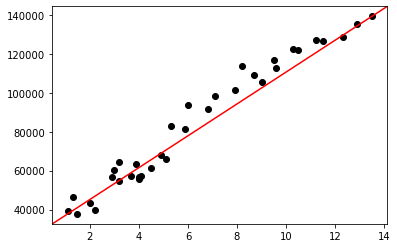

In [2]:
def mse(m, b, points):
    """This function doesn't actually get used here because the mse is calculated inside of gradient descent"""
    total_error = 0 # add all the individual squeared errors to this variable
    
    for i in range(len(points)):
        x = points.iloc[i].years
        y = points.iloc[i].salary
        
        total_error += (y - ((m*x) + b))**2
    return total_error / len(points)


def gradient_descent(m_now,b_now,points,LR):
    
    # calculates m and b at various moments in time (on the line)
    m_gradient = 0
    b_gradient = 0
    
    n = len(points)
    
    for i in range(n):
        x = points.iloc[i].years
        y = points.iloc[i].salary
        
        m_gradient += -(2/n) * x * (y - ((m_now*x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now*x) + b_now))
            
    m = m_now - (LR * m_gradient)
    b = b_now - (LR * b_gradient)
    
    return m,b
    
m = 0
b = 0
LR = 0.0001
epochs = 1000

for i in range(epochs):
    m,b = gradient_descent(m,b,data,LR)
    if i % 50 == 0:
        print("#"*30)
        print(f"Epoch: {i}\nm: {m}\nb: {b}") # displays all the even epochs
    
    
x = data.years
y = data.salary
plt.scatter(x,y,color="black")

x_lim = plt.xlim()
y_lim = plt.ylim()
plt.plot(x_lim,y_lim, color="red")
plt.ylim(y_lim)
plt.xlim(x_lim)
plt.show()